In [56]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as st
from scipy.stats import linregress


In [57]:
# Read in csv
csv_path = Path("spotify-2023.csv")

top_spotify = pd.read_csv(csv_path)
top_spotify

top_spotify_df = pd.DataFrame(top_spotify)
top_spotify_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [58]:
# Drop null values
clean_spotify_df = top_spotify_df.dropna()
clean_spotify_df = clean_spotify_df.drop([574])
clean_spotify_df["streams"] = clean_spotify_df["streams"].astype(float)
clean_spotify_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


In [59]:
# Groupby number of streams

spotify_streams_df = clean_spotify_df.set_index("streams")
spotify_streams_ranked = spotify_streams_df.sort_values("streams", ascending=False)
spotify_streams_ranked

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
streams,,,,,,,,,,,,,,,,,,,,,
3.562544e+09,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,33,0,...,96,C#,Minor,83,93,65,58,0,9,8
2.808097e+09,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,372,117,...,90,D,Major,76,91,50,54,0,7,5
2.713922e+09,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,433,107,...,104,C#,Major,77,36,63,1,0,36,5
2.665344e+09,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,492,99,...,170,C#,Major,59,48,76,4,0,10,5
2.594040e+09,Believer,Imagine Dragons,1,2017,1,31,18986,23,250,121,...,125,A#,Minor,77,74,78,4,0,23,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.258116e+07,Rush,Troye Sivan,1,2023,7,13,864,78,71,135,...,126,F,Minor,74,35,84,0,0,11,6
1.478042e+07,Overdrive,Post Malone,1,2023,7,14,410,36,36,32,...,140,C#,Major,56,48,73,0,0,35,4
1.195664e+07,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,5,2,...,133,B,Minor,93,68,65,42,0,12,25


In [60]:
# Only filter by songs released in 2023

top_streams_2023 = spotify_streams_df[(spotify_streams_df["released_year"] == 2023)]
top_streams_2023_ranked = top_streams_2023.sort_values("streams", ascending=False)
top_streams_2023_ranked

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
streams,,,,,,,,,,,,,,,,,,,,,
725980112.0,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,34,222,...,148,F,Minor,67,83,76,48,0,8,3
721975598.0,"Shakira: Bzrp Music Sessions, Vol. 53","Shakira, Bizarrap",2,2023,1,11,5724,44,119,108,...,122,D,Minor,78,50,63,27,0,9,5
618990393.0,TQG,"Karol G, Shakira",2,2023,2,23,4284,49,115,123,...,180,E,Minor,72,61,63,67,0,9,28
553634067.0,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,49,110,...,170,D,Minor,81,56,48,21,0,8,33
518745108.0,Die For You - Remix,"Ariana Grande, The Weeknd",2,2023,2,24,3408,47,87,86,...,67,C#,Minor,53,50,53,23,0,44,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29562220.0,New Jeans,NewJeans,1,2023,7,7,77,35,8,166,...,134,E,Minor,81,53,72,51,0,12,5
24975653.0,Danger (Spider) (Offset & JID),"Offset, JID",2,2023,6,2,214,0,3,3,...,143,B,Major,83,25,69,4,0,23,12
22581161.0,Rush,Troye Sivan,1,2023,7,13,864,78,71,135,...,126,F,Minor,74,35,84,0,0,11,6


The r-value is: -0.51


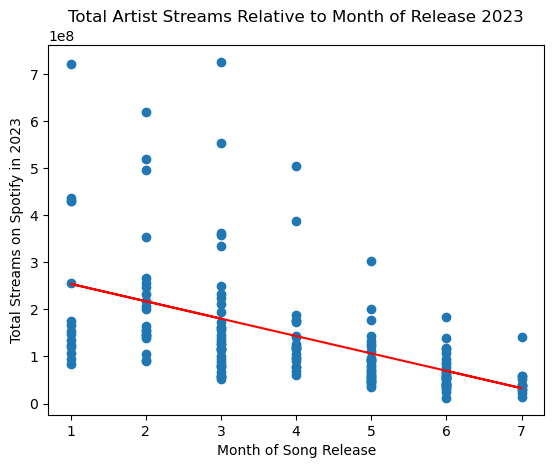

In [61]:
# Plot total streams by release month
x_axis = top_streams_2023_ranked['released_month']
y_axis = top_streams_2023_ranked.index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.title('Total Artist Streams Relative to Month of Release 2023')
plt.xlabel('Month of Song Release')
plt.ylabel('Total Streams on Spotify in 2023')
plt.savefig("output_data/streams_x_month.png")
plt.show()



The r-value is: -0.09


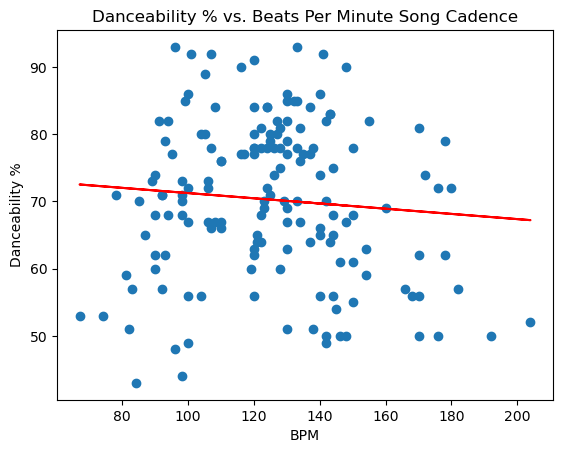

In [62]:
# Trial scatterplot with 2 likely correlated key features (bpm and danceability)
x_axis = top_streams_2023_ranked['bpm']
y_axis = top_streams_2023_ranked["danceability_%"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.title('Danceability % vs. Beats Per Minute Song Cadence')
plt.xlabel('BPM')
plt.ylabel('Danceability %')
plt.savefig("output_data/dance_x_bpm.png")
plt.show()


The r-value is: 0.14


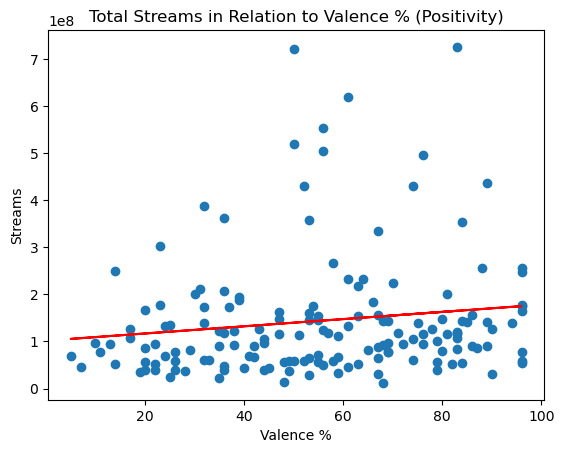

In [63]:
# Streams by valence % (positivity of musical content)
x_axis = top_streams_2023_ranked["valence_%"]
y_axis = top_streams_2023_ranked.index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.title('Total Streams in Relation to Valence % (Positivity)')
plt.xlabel('Valence %')
plt.ylabel('Streams')
plt.savefig("output_data/streams_x_positivity.png")
plt.show()

The r-value is: -0.04


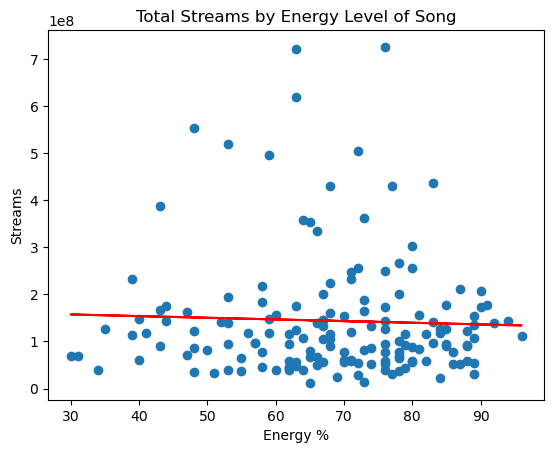

In [64]:
# Popularity by song key??
x_axis = top_streams_2023_ranked["energy_%"]
y_axis = top_streams_2023_ranked.index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.title('Total Streams by Energy Level of Song')
plt.xlabel('Energy %')
plt.ylabel('Streams')
plt.savefig("output_data/streams_x_energy.png")
plt.show()

In [65]:
# Import Alaina's streaming CSV
csv_path2 = Path("2023 Spotify Data.csv")

spotify_data_2023 = pd.read_csv(csv_path2)
spotify_data_2023

spotify_data_2023_df = pd.DataFrame(spotify_data_2023)

del spotify_data_2023_df["uri"]
spotify_data_2023_df


,week,rank,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams
0,2023.01,1,SZA,Kill Bill,Top Dawg Entertainment/RCA Records,1,2,4,15030938
1,2023.01,2,"Drake, 21 Savage",Rich Flex,OVO / Republic Records,1,13,9,8469115
2,2023.01,3,"Metro Boomin, The Weeknd, 21 Savage",Creepin' (with The Weeknd & 21 Savage),Republic Records,1,12,5,8039812
3,2023.01,4,Taylor Swift,Anti-Hero,Taylor Swift,1,26,11,6821345
4,2023.01,5,Lil Uzi Vert,Just Wanna Rock,Generation Now/Atlantic,5,21,12,6709165
...,...,...,...,...,...,...,...,...,...
9195,2023.44,196,Michael Bublé,It's Beginning to Look a Lot like Christmas,Reprise,7,-1,41,2121166
9196,2023.44,197,Morgan Wallen,Chasin' You,Big Loud Records,55,-1,140,2117578
9197,2023.44,198,"Lil Baby, Drake",Yes Indeed,"Quality Control Music, LLC",2,-1,167,2108074
9198,2023.44,199,Taylor Swift,Blank Space,"Big Machine Records, LLC",34,127,37,2102969


In [66]:
# Index by track name

track_name = spotify_data_2023_df.set_index("track_name")
track_name_sorted = track_name.sort_values("streams", ascending=False)
track_name_sorted

,week,rank,artist_names,source,peak_rank,previous_rank,weeks_on_chart,streams
track_name,,,,,,,,
Flowers,2023.04,1,Miley Cyrus,Columbia,1,1,2,21784758
Flowers,2023.03,1,Miley Cyrus,Columbia,1,-1,1,20849005
Is It Over Now? (Taylor's Version) (From The Vault),2023.43,1,Taylor Swift,Taylor Swift,1,-1,1,20062285
vampire,2023.27,1,Olivia Rodrigo,Olivia Rodrigo PS,1,-1,1,18614248
vampire,2023.28,1,Olivia Rodrigo,Olivia Rodrigo PS,1,-1,1,18614248
...,...,...,...,...,...,...,...,...
Chamber Of Reflection,2023.01,196,Mac DeMarco,Captured Tracks,196,-1,1,1767184
Ni**as In Paris,2023.01,197,"JAY-Z, Kanye West",Roc Nation/RocAFella/IDJ,107,-1,51,1764826
Buy Dirt,2023.01,198,"Jordan Davis, Luke Bryan",MCA Nashville,67,-1,64,1764496


In [67]:
# Index by artist name
artist_name = spotify_data_2023_df.set_index("artist_names")
artist_name_sorted = artist_name.sort_values("streams", ascending=False)
artist_name_sorted

,week,rank,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams
artist_names,,,,,,,,
Miley Cyrus,2023.04,1,Flowers,Columbia,1,1,2,21784758
Miley Cyrus,2023.03,1,Flowers,Columbia,1,-1,1,20849005
Taylor Swift,2023.43,1,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1,-1,1,20062285
Olivia Rodrigo,2023.27,1,vampire,Olivia Rodrigo PS,1,-1,1,18614248
Olivia Rodrigo,2023.28,1,vampire,Olivia Rodrigo PS,1,-1,1,18614248
...,...,...,...,...,...,...,...,...
Mac DeMarco,2023.01,196,Chamber Of Reflection,Captured Tracks,196,-1,1,1767184
"JAY-Z, Kanye West",2023.01,197,Ni**as In Paris,Roc Nation/RocAFella/IDJ,107,-1,51,1764826
"Jordan Davis, Luke Bryan",2023.01,198,Buy Dirt,MCA Nashville,67,-1,64,1764496


In [68]:
total_streams_2023 = spotify_data_2023_df.groupby(['track_name', 'artist_names'])['streams'].sum()
total_streams_2023
total_streams_2023_df = pd.DataFrame(total_streams_2023)
total_streams_2023_df

total_streams_2023_df_sorted = total_streams_2023_df.sort_values('streams', ascending=False)
total_streams_2023_df_sorted

,,streams
track_name,artist_names,
Last Night,Morgan Wallen,414584348
Kill Bill,SZA,388686470
Ella Baila Sola,"Eslabon Armado, Peso Pluma",267965608
Flowers,Miley Cyrus,263735971
Boy's a liar Pt. 2,"PinkPantheress, Ice Spice",261903576
...,...,...
On Wat U On (with GloRilla),"Moneybagg Yo, GloRilla",1864790
Billete Grande (En Vivo),"Fuerza Regida, Edgardo Nuñez",1853961
Neverita,Bad Bunny,1837465


In [69]:
# Compare artists from this DataFrame to original spotify-2023.csv

spotify_data_2023_df = spotify_data_2023_df.rename(columns={"artist_names": "Artist", "track_name": "Track Title", "streams": "Total Streams"})
spotify_data_2023_df

,week,rank,Artist,Track Title,source,peak_rank,previous_rank,weeks_on_chart,Total Streams
0,2023.01,1,SZA,Kill Bill,Top Dawg Entertainment/RCA Records,1,2,4,15030938
1,2023.01,2,"Drake, 21 Savage",Rich Flex,OVO / Republic Records,1,13,9,8469115
2,2023.01,3,"Metro Boomin, The Weeknd, 21 Savage",Creepin' (with The Weeknd & 21 Savage),Republic Records,1,12,5,8039812
3,2023.01,4,Taylor Swift,Anti-Hero,Taylor Swift,1,26,11,6821345
4,2023.01,5,Lil Uzi Vert,Just Wanna Rock,Generation Now/Atlantic,5,21,12,6709165
...,...,...,...,...,...,...,...,...,...
9195,2023.44,196,Michael Bublé,It's Beginning to Look a Lot like Christmas,Reprise,7,-1,41,2121166
9196,2023.44,197,Morgan Wallen,Chasin' You,Big Loud Records,55,-1,140,2117578
9197,2023.44,198,"Lil Baby, Drake",Yes Indeed,"Quality Control Music, LLC",2,-1,167,2108074
9198,2023.44,199,Taylor Swift,Blank Space,"Big Machine Records, LLC",34,127,37,2102969


In [70]:
clean_spotify_df = clean_spotify_df.rename(columns={"track_name": "Track Title", "artist(s)_name": "Artist", "streams": "Total Streams"})
clean_spotify_df

,Track Title,Artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,Total Streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


In [71]:
clean_spotify_df_2023 = clean_spotify_df[(clean_spotify_df["released_year"] == 2023)]
clean_spotify_df_2023

,Track Title,Artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,Total Streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234.0,67,...,141,C#,Major,92,66,58,19,0,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,Love Again,The Kid Laroi,1,2023,1,27,1283,0,147538971.0,57,...,107,B,Minor,66,47,40,72,0,11,3
380,LLYLM,ROSALÔøΩ,1,2023,1,27,1838,0,124988687.0,105,...,170,F#,Minor,56,56,63,13,0,19,27
382,TRUSTFALL,P!nk,1,2023,1,27,2098,16,134255790.0,88,...,122,G#,Major,64,25,89,0,0,15,9
398,MuÔøΩÔøΩ,"Steve Aoki, Tini, La Joaqui",3,2023,1,12,658,6,120972253.0,33,...,90,A#,Minor,68,83,71,3,0,31,8


In [72]:
# Merge two new dataframes

final_spotify_streams_2023 = pd.merge(clean_spotify_df_2023, spotify_data_2023_df, on=["Artist", "Track Title", "Total Streams"], how="outer").reset_index()
final_spotify_streams_2023  = final_spotify_streams_2023.drop(columns=["artist_count", "released_day"])
final_spotify_streams_2023


,index,Track Title,Artist,released_year,released_month,in_spotify_playlists,in_spotify_charts,Total Streams,in_apple_playlists,in_apple_charts,...,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,week,rank,source,peak_rank,previous_rank,weeks_on_chart
0,0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023.0,7.0,553.0,147.0,141381703.0,43.0,263.0,...,31.0,0.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,LALA,Myke Towers,2023.0,3.0,1474.0,48.0,133716286.0,48.0,126.0,...,7.0,0.0,10.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,vampire,Olivia Rodrigo,2023.0,6.0,1397.0,113.0,140003974.0,94.0,207.0,...,17.0,0.0,31.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,WHERE SHE GOES,Bad Bunny,2023.0,5.0,3133.0,50.0,303236322.0,84.0,133.0,...,14.0,63.0,11.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Sprinter,"Dave, Central Cee",2023.0,6.0,2186.0,91.0,183706234.0,67.0,213.0,...,19.0,0.0,8.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9354,9354,It's Beginning to Look a Lot like Christmas,Michael Bublé,NaN,NaN,NaN,NaN,2121166.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2023.44,196.0,Reprise,7.0,-1.0,41.0
9355,9355,Chasin' You,Morgan Wallen,NaN,NaN,NaN,NaN,2117578.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2023.44,197.0,Big Loud Records,55.0,-1.0,140.0
9356,9356,Yes Indeed,"Lil Baby, Drake",NaN,NaN,NaN,NaN,2108074.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2023.44,198.0,"Quality Control Music, LLC",2.0,-1.0,167.0
9357,9357,Blank Space,Taylor Swift,NaN,NaN,NaN,NaN,2102969.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2023.44,199.0,"Big Machine Records, LLC",34.0,127.0,37.0


In [73]:
#make dataframes for just the top/bottom percentage of songs
top_clean_df_2023 = clean_spotify_df.head(150)
bot_clean_df_2023 = clean_spotify_df.tail(150)
#drop unneccesary columns for viewing
top_clean_df_2023 = top_clean_df_2023[['Track Title','Total Streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
bot_clean_df_2023 = bot_clean_df_2023[['Track Title','Total Streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
#view data for exploration
bot_clean_df_2023

,Track Title,Total Streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
787,ULTRA SOLO,3.077526e+08,110,80,26,85,23,0,11,21
788,EnsÔøΩÔøΩÔøΩÔøΩame,2.797379e+08,105,81,77,79,19,0,47,8
789,El ApagÔøΩ,2.123519e+08,118,63,60,70,5,0,9,31
790,Callaita,1.304314e+09,176,61,24,62,60,0,24,31
791,Dua Lipa,1.505010e+08,158,83,41,65,0,10,11,8
...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,9.147336e+07,144,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,1.218719e+08,166,42,7,24,83,1,12,6
950,A Veces (feat. Feid),7.351368e+07,92,80,81,67,4,0,8,6
951,En La De Ella,1.338956e+08,97,82,67,77,8,0,12,5


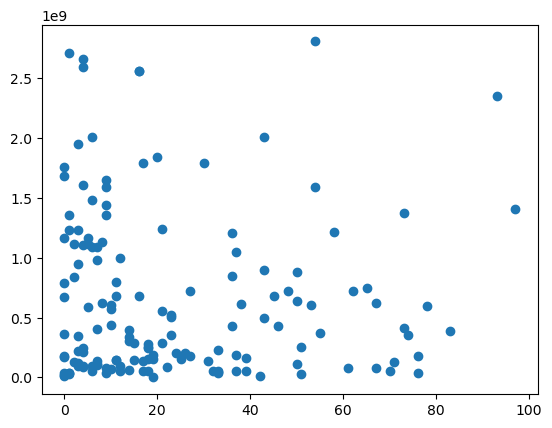

In [74]:
#viewing possible correlations between streams and datapoints for top percent
x_axis = top_clean_df_2023['acousticness_%']
y_axis = top_clean_df_2023['Total Streams']

plt.scatter(x_axis, y_axis)
plt.show()

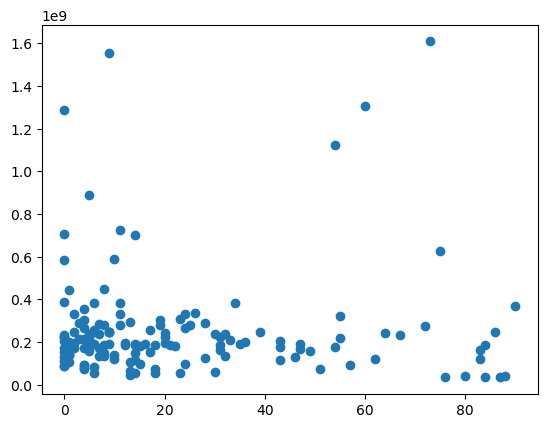

In [75]:
#viewing possible correlations between streams and datapoints for bottom percent

x_axis = bot_clean_df_2023['acousticness_%']
y_axis = bot_clean_df_2023['Total Streams']

plt.scatter(x_axis, y_axis)

plt.show()

In [76]:
#count number of times each key is used
clean_spotify_df.value_counts('key')

key
C#    115
G      91
F      87
G#     85
D      78
B      77
A      70
F#     69
E      59
A#     55
D#     30
Name: count, dtype: int64

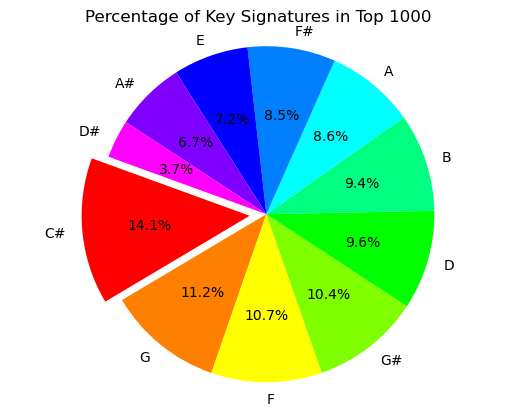

In [85]:
# define data set
key_counts = clean_spotify_df['key'].value_counts()

# extract labels and sizes from value_counts result
labels = key_counts.index
sizes = key_counts.values
colors = ['#ff0000', '#ff8000', '#ffff00', '#80ff00', '#00ff00', '#00ff80', '#00ffff','#0080ff', '#0000ff', '#8000ff', '#ff00ff', '#ff0080'  ]

explode = [0.1 if label == 'C#' else 0 for label in labels]

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=160, explode=explode, colors = colors)
plt.axis('equal')  
plt.title('Percentage of Key Signatures in Top 1000')
plt.savefig("output_data/top_1000_keys.png")

# Display the chart
plt.show()

In [78]:
#make a DF for just taylors songs
taylor_songs = clean_spotify_df[clean_spotify_df['Artist'] == 'Taylor Swift']
taylor_songs

,Track Title,Artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,Total Streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,8.008408e+08,116,...,170,A,Major,55,58,72,11,0,11,15
21,I Can See You (TaylorÔøΩÔøΩÔøΩs Version) (From...,Taylor Swift,1,2023,7,7,516,38,5.213525e+07,73,...,123,F#,Major,69,82,76,6,0,6,3
33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,9.997483e+08,242,...,97,E,Major,64,51,63,12,0,19,5
37,Blank Space,Taylor Swift,1,2014,1,1,11434,53,1.355959e+09,154,...,96,F,Major,75,57,68,9,0,13,6
38,Style,Taylor Swift,1,2014,1,1,7830,42,7.861818e+08,94,...,95,D,Major,60,48,79,0,0,12,4
66,Karma,Taylor Swift,1,2022,10,21,3818,23,4.045628e+08,37,...,90,G#,Major,64,10,62,7,0,48,7
69,Enchanted (Taylor's Version),Taylor Swift,1,2023,7,7,148,24,3.957818e+07,32,...,82,G#,Major,51,22,53,1,0,15,3
83,Back To December (Taylor's Version),Taylor Swift,1,2023,7,7,139,17,3.922893e+07,16,...,142,D,Major,50,20,64,1,0,12,3
93,DonÔøΩÔøΩÔøΩt Bl,Taylor Swift,1,2017,11,8,4875,23,6.850325e+08,19,...,136,A,Minor,62,19,53,11,0,6,4
100,Lover,Taylor Swift,1,2012,1,1,8448,23,8.828312e+08,160,...,206,G,Major,43,50,55,50,0,15,10


In [79]:
#count number of times each key taylor used
taylor_keys = taylor_songs['key'].value_counts()
taylor_keys

key
G     7
E     4
F     4
D     4
F#    3
G#    3
A     2
B     1
A#    1
Name: count, dtype: int64

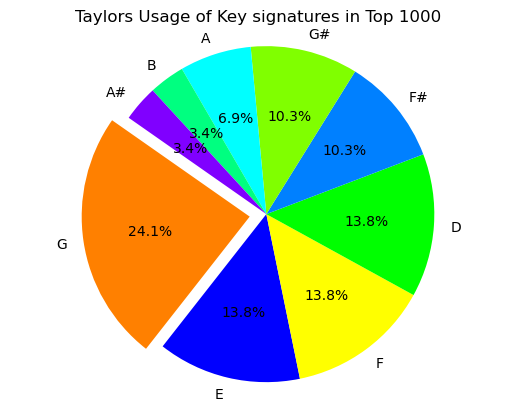

In [86]:


# Extract labels and sizes from value_counts result
labels = taylor_keys.index
sizes = taylor_keys.values
colors = ['#ff8000','#0000ff', '#ffff00', '#00ff00', '#0080ff', '#80ff00', '#00ffff','#00ff80', '#8000ff']
explode = [0.1 if label == 'G' else 0 for label in labels]

# plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=145, colors = colors, explode = explode )
plt.axis('equal')  
plt.title('Taylors Usage of Key signatures in Top 1000')
plt.savefig("output_data/taylors_keys.png")

# Display the chart
plt.show()

In [81]:
top_artists = clean_spotify_df['Artist'].value_counts()
top_artists.head(100)

Artist
Taylor Swift                                        29
SZA                                                 17
Bad Bunny                                           16
The Weeknd                                          15
Kendrick Lamar                                      12
                                                    ..
Riton, Nightcrawlers, Mufasa & Hypeman, Dopamine     1
Maroon 5                                             1
J Balvin, Nio Garcia, Bad Bunny                      1
Eminem, Nate Dogg                                    1
Gunna, Lil Baby                                      1
Name: count, Length: 100, dtype: int64

In [82]:
notswift_songs = clean_spotify_df[clean_spotify_df['Artist'].isin(['SZA', 'Bad Bunny', 'The Weeknd', 'Kendrick Lamar', 'Harry Styles', 'Morgan Wallen'])]
notswift_songs

,Track Title,Artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,Total Streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,3.032363e+08,84,...,144,A,Minor,65,23,80,14,63,11,6
15,Kill Bill,SZA,1,2022,12,8,8109,77,1.163094e+09,183,...,89,G#,Major,64,43,73,5,17,16,4
28,Last Night,Morgan Wallen,1,2023,1,31,2420,19,4.298298e+08,52,...,204,F#,Major,52,52,68,46,0,15,4
47,Die For You,The Weeknd,1,2016,11,24,2483,59,1.647990e+09,68,...,134,C#,Minor,59,51,52,9,0,15,7
97,Snooze,SZA,1,2022,12,9,2839,25,3.996868e+08,58,...,143,F,Major,56,39,55,14,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,Love Of My Life,Harry Styles,1,2022,5,20,1933,0,2.336713e+08,13,...,118,G,Major,56,20,54,67,0,6,5
843,Grapejuice,Harry Styles,1,2022,5,20,1986,0,1.995879e+08,7,...,183,F,Major,65,88,72,36,14,20,3
846,Keep Driving,Harry Styles,1,2022,5,20,2094,1,2.360607e+08,8,...,165,A,Major,72,90,48,32,0,18,23
847,Cinema,Harry Styles,1,2022,5,20,2171,0,1.892369e+08,18,...,106,A,Minor,83,90,64,35,5,9,4


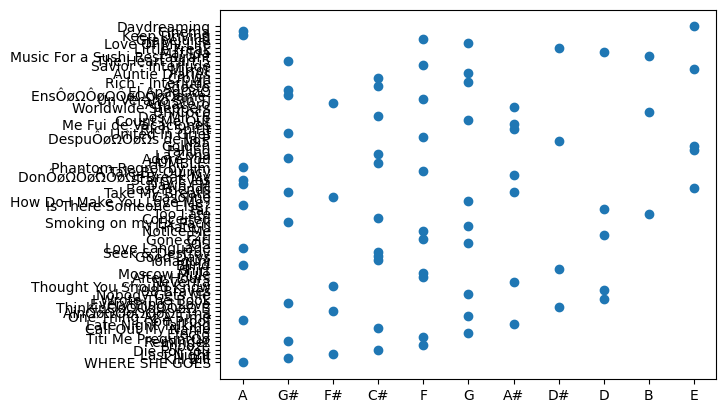

In [83]:
#used to explore possible correlations please ignore

x_axis = notswift_songs['key']
y_axis = notswift_songs['Track Title']

plt.scatter(x_axis, y_axis)
plt.show()

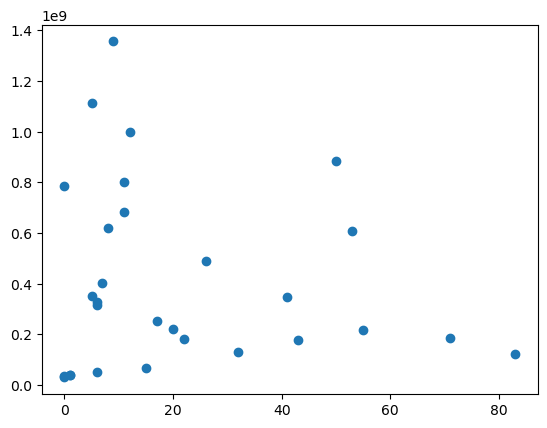

In [84]:
x_axis = taylor_songs['acousticness_%']
y_axis = taylor_songs['Total Streams']

plt.scatter(x_axis, y_axis)
plt.show()